**2357526 Aaditya Parajuli Regression**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
path = "/content/drive/MyDrive/AI_FINAL/regression/diamonds.csv"
df = pd.read_csv(path)

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. The dataset has ten attributes, including the target, or price.

Description of the feature:


cost in US dollars (326-- 18,823)This is the target column where the feature tags are located.

The four Cs of diamonds are:

carat (0.2-- 5.01) The diamond's physical weight, expressed in metric carats, is called its carat. One carat is divided into 100 points and is equivalent to one fifth gramme. The most objective of the four Cs is carat weight.


cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)

The flat facet of a diamond that is visible when the stone is face up is referred to as its table. Refracting incoming light rays and allowing reflected light rays from within the diamond to reach the observer's eye is the primary function of a diamond table. The perfect table cut diamond will have breathtaking brilliance and fire.

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Data cleaning

Identifying and removing outliers

Encoding categorical variables

In [ ]:
print("The shape of the dataset: ",df.shape)
column_names = df.columns.tolist() #df.coloumn returns the pandas index object with coloumn dataframe.

print("\nAttributes (Columns) of the Dataset:") #printout or display the coloumn attributes
print(column_names)

The shape of the dataset:  (53940, 11)

Attributes (Columns) of the Dataset:
['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


In [ ]:
#The first column seems to be just index
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [ ]:
# Display the first few rows of the dataset
print(df.head())


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
# Summary statistics of the dataset
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [ ]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

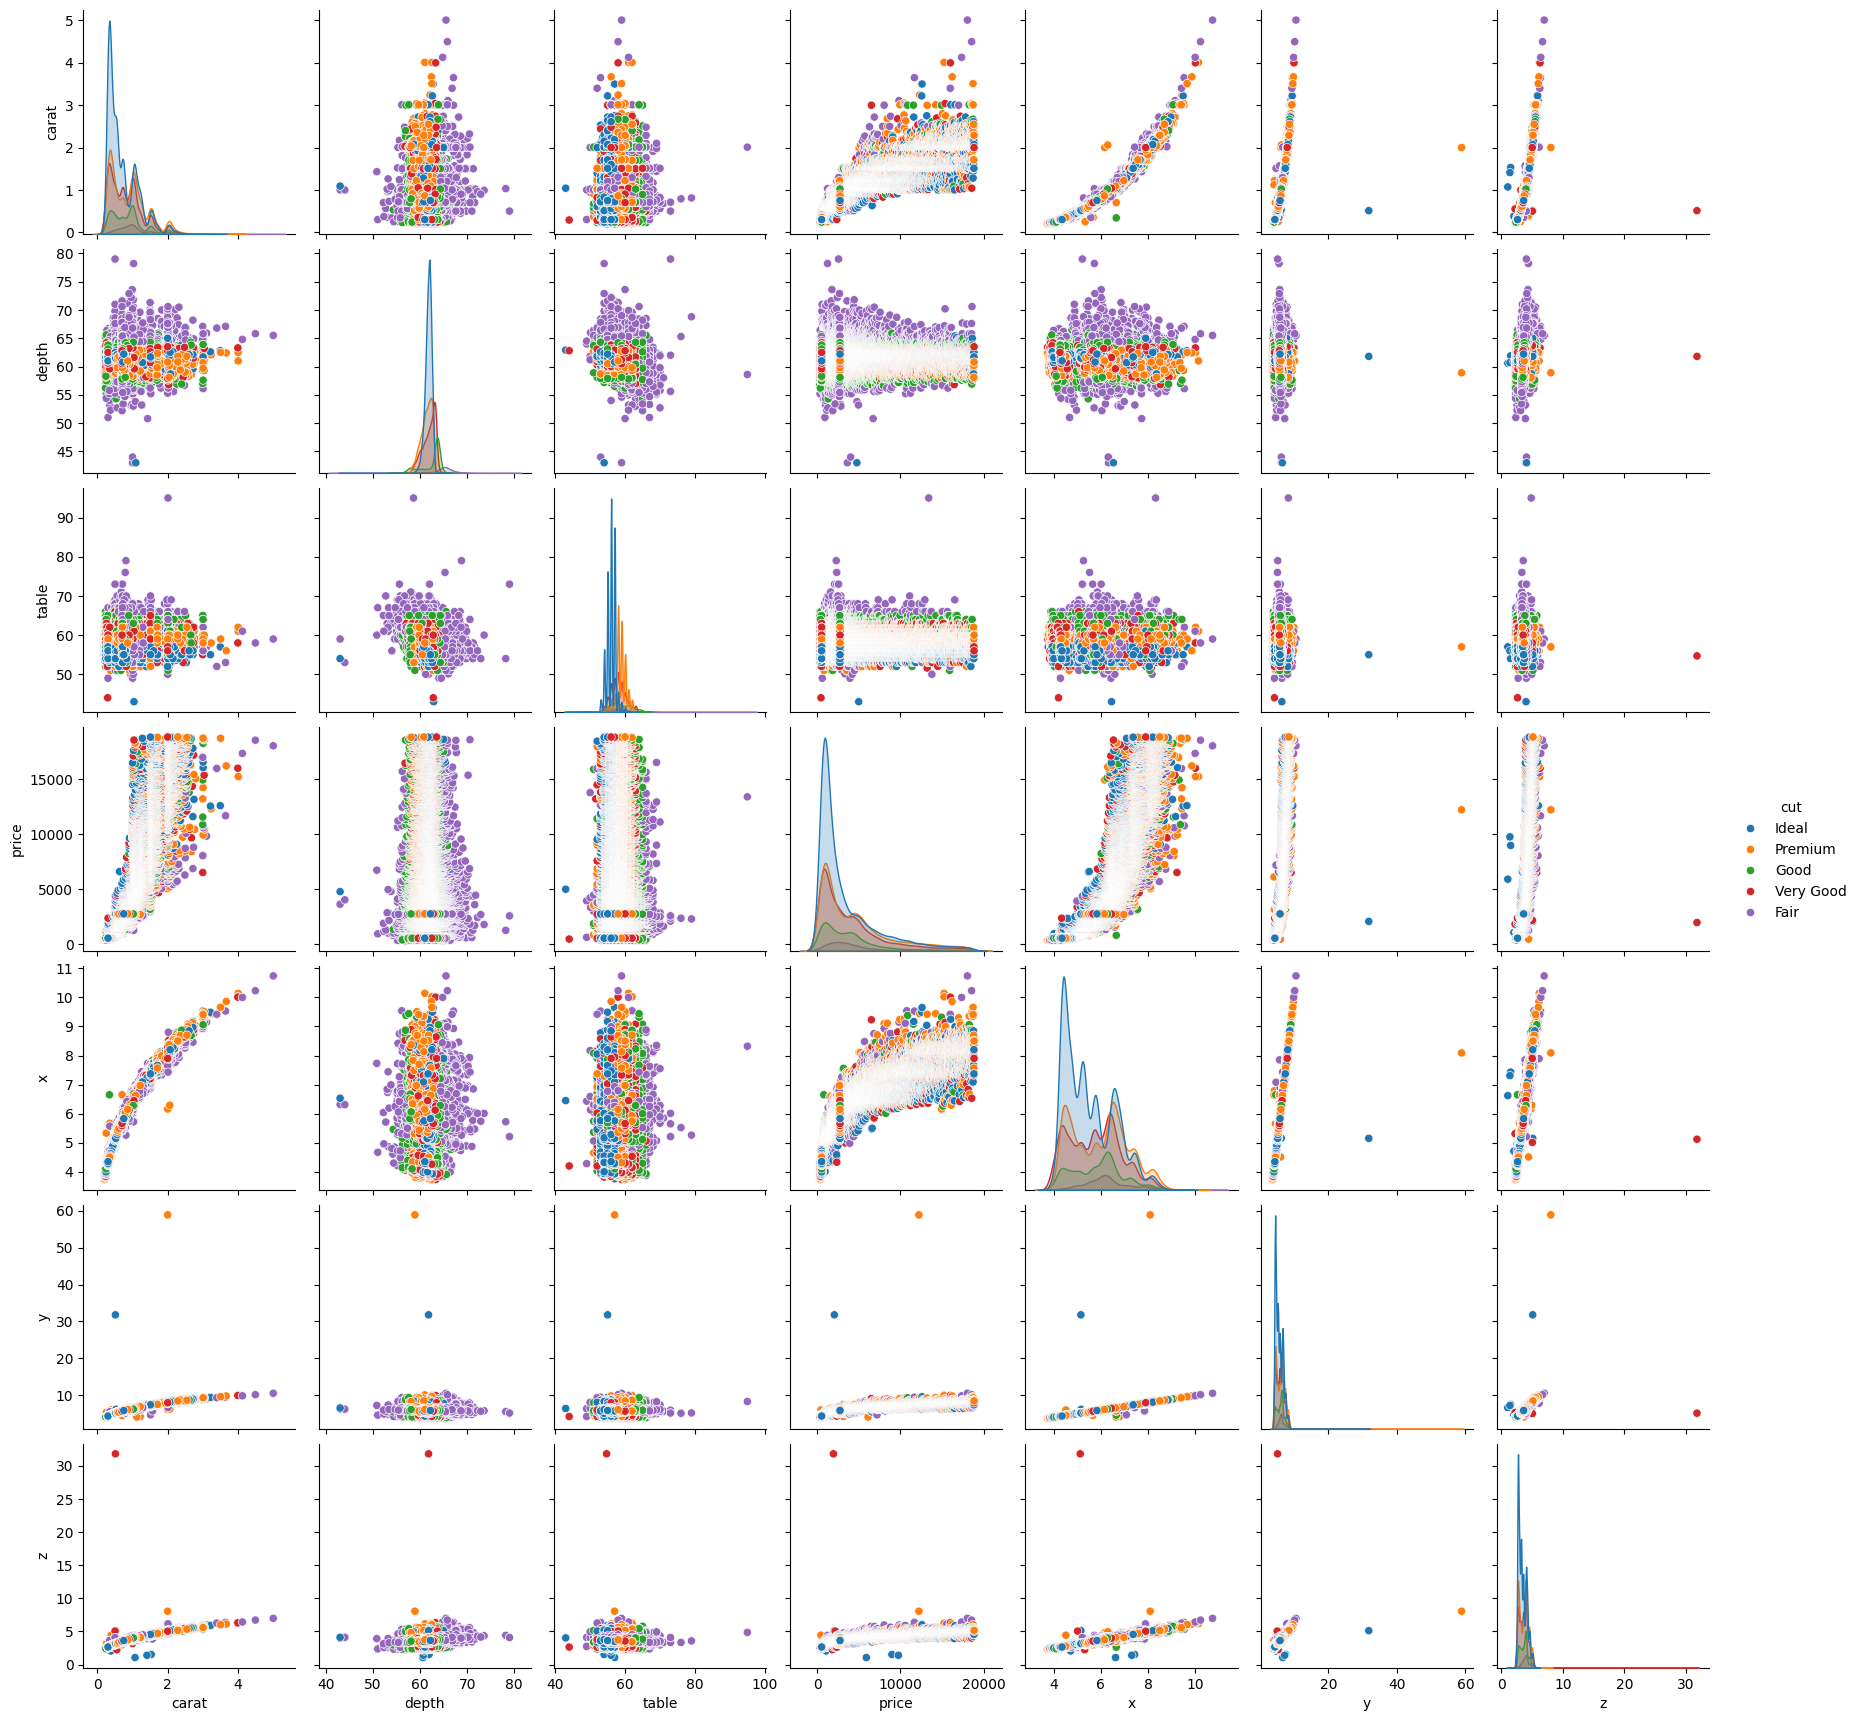

In [ ]:
ax=sns.pairplot(df, hue= "cut")

A few points to notice in these pair plots

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

1. "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
2. The "depth" should be capped but we must examine the regression line to be sure.
3. The "table" featured should be capped too.

In [ ]:
#Dropping the outliers.
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

Next, we will deal with the categorical variables.

In [ ]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)


Categorical variables:
['cut', 'color', 'clarity']


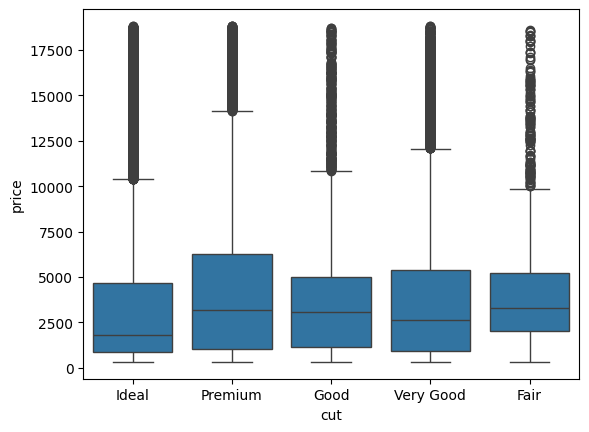

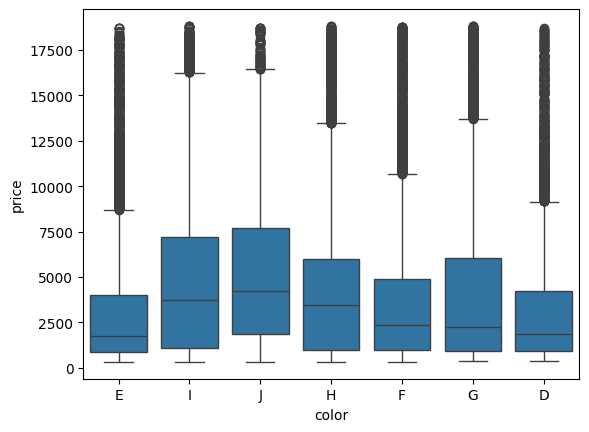

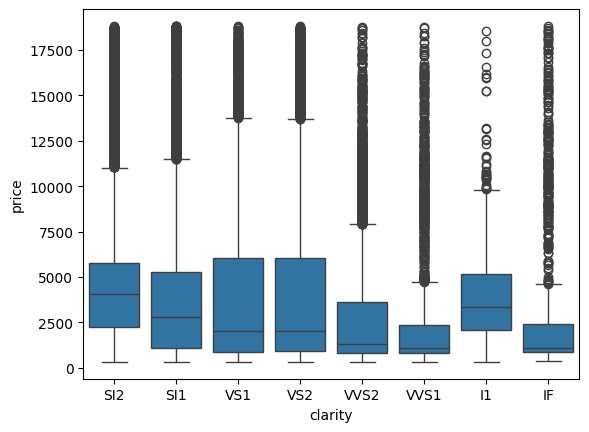

In [ ]:
# Boxplot for cut
sns.boxplot(x='cut', y='price', data=df)
plt.show()

# Boxplot for color
sns.boxplot(x='color', y='price', data=df)
plt.show()

# Boxplot for clarity
sns.boxplot(x='clarity', y='price', data=df)
plt.show()

**BoxPlot of Price and Cut**

  >The boxplot shows that the "price" variable differs for each "cut" category. In particular, the median "price" for "Premium" and "Ideal" categories is greater than that of "Good" and "Fair" categories. In addition, the boxes for "Premium" and "Ideal" categories are smaller than those for "Good" and "Fair" categories, suggesting that "price" varies less for the former three.


**BoxPlot of price and color**

>From the boxplot, we can see that there are four categories of "color" in the dataset, namely "D", "E", "F", and "G". The median "price" is higher for the "D" category compared to the other categories, indicating that diamonds with a "D" color grade tend to be more expensive.

>Additionally, we can observe that there is less variability in the "price" for the "D" and "E" categories compared to the "F" and "G" categories, as indicated by the narrower boxes. This suggests that diamonds with a "D" or "E" color grade have a more consistent price range compared to those with a "F" or "G" color grade.

**BoxPlot of price and Clarity**

>From the boxplot, we can see that there are eight categories of "clarity" in the dataset, ranging from "IF" (Internally Flawless) to "I1" (Included, level 1). The median "price" tends to be higher for diamonds with higher clarity grades, indicating that clarity is an important factor that affects the price of a diamond.

>The boxplot also shows the variability in the "price" for each clarity grade. For example, we can see that there is less variability in the "price" for diamonds with "IF" clarity compared to those with "SI1" clarity. This suggests that diamonds with higher clarity grades tend to have a more consistent price range compared to those with lower clarity grades.

Lable encoding the data to get rid of object dtype.

In [ ]:
# Make copy to avoid changing original data
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

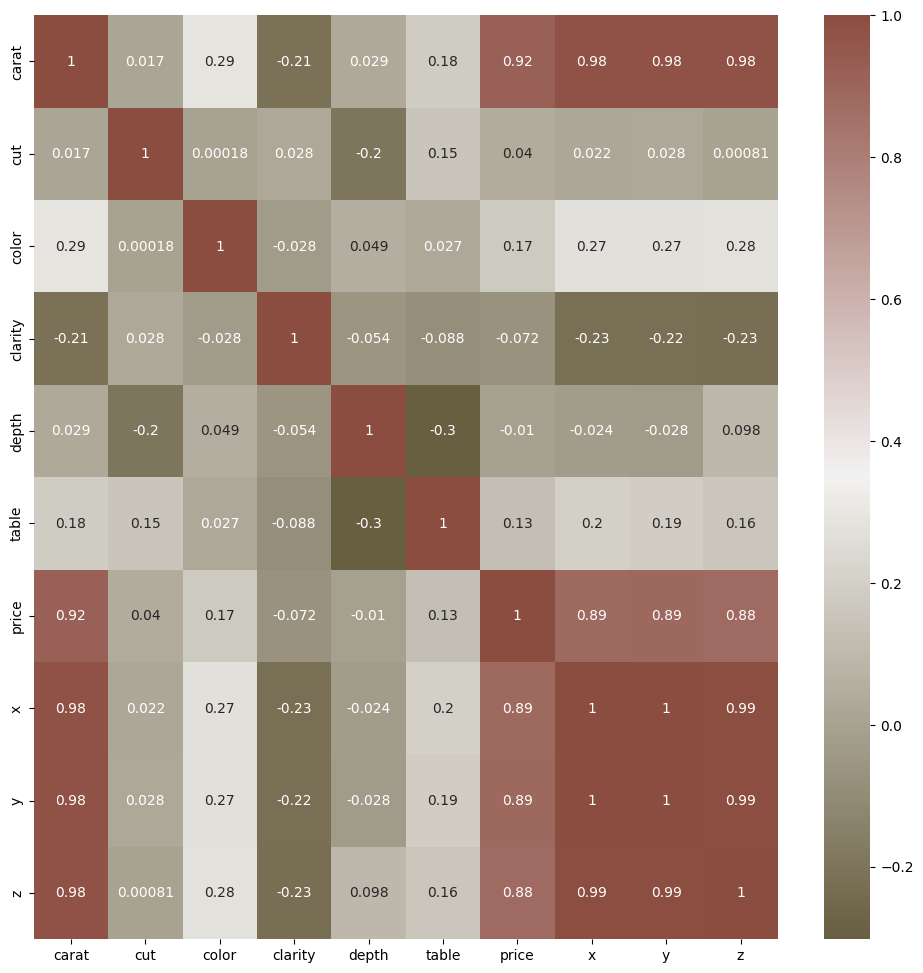

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

"x", "y" and "z" show a high correlation to the target column.

"depth", "cut" and "table" show low correlation.

# **MODEL BUILDING**

Setting up features and target

1. Build a pipeline of standard scalar and model for five different regressors.

2. Fit all the models on training data

3. Get mean of cross-validation on the training set for all the models for negative root mean square error

4. Pick the model with the best cross-validation score

5. Fit the best model on the training set and get

In [ ]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [ ]:
print("test samples:", X_test.shape[0])
print("training samples:",X_train.shape[0])


test samples: 13477
training samples: 40430


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Linear Regression MSE:', lr_mse)
print('Linear Regression R2 Score:', lr_r2)
print('Random Forest Regression MSE:', rf_mse)
print('Random Forest Regression R2 Score:', rf_r2)

Linear Regression MSE: 1750616.94094599
Linear Regression R2 Score: 0.8845972611555365
Random Forest Regression MSE: 303659.0580110081
Random Forest Regression R2 Score: 0.9799824358203322


# **Feature Selection**

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1347.692979 
DecisionTree: -750.527352 
RandomForest: -550.868604 
KNeighbors: -820.802944 
XGBRegressor: -553.510657 


Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803836432014872
Adjusted R^2: 0.980370533584558
MAE: 274.61409438257004
MSE: 297572.89016685274
RMSE: 545.5024199459181
